In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('student-scores.csv')

In [3]:
df.head()

,sex,eyes,grade,score_in,score_out
0,Male,Green,High,95,116
1,Male,Blue,Low,92,96
2,Female,Blue,High,104,128
3,Female,Green,Low,96,104
4,Male,Green,High,104,116


In [4]:
class NaiveEstimator(sklearn.base.BaseEstimator):
    def __init__(self):
        self.naive_predictor = 0
    
    def fit(self, x, y):
        self.naive_predictor = y.mean()
        return self
        
    def predict(self, train_data):
        import numpy as np
        return np.repeat(self.naive_predictor, train_data.shape[0])
    
class CatEstimator(sklearn.base.BaseEstimator):
    def __init__(self):
        self.cat_feature_name = ''        
        self.cat_predictor = None
        
    def fit(self, x, y):
        self.cat_predictor = dict(x.groupby(self.cat_feature_name)['score_out'].mean())
        return self
        
    def predict(self, test_data):
        pred = test_data.apply(lambda row: self.cat_predictor[row[self.cat_feature_name]], 1)
        return pred
    
class GenderEstimator(CatEstimator):
    def __init__(self):
        self.cat_feature_name = 'sex'        
        
class GradeEstimator(CatEstimator):
    def __init__(self):
        self.cat_feature_name = 'grade' 
        
class EyeColorEstimator(CatEstimator):
    def __init__(self):
        self.cat_feature_name = 'eyes'            

In [5]:
X, Y = df[['sex', 'grade', 'eyes', 'score_out']], df['score_out']

In [6]:
est = NaiveEstimator()
est.fit(X, Y)
score = mean_squared_error(est.predict(X), Y)

print('mean estimator train error: {:.2f}'.format(score))

mean estimator train error: 329.73


In [7]:
est = NaiveEstimator()
score = np.mean(-cross_val_score(est, df[['score_out']], df['score_out'], scoring='neg_mean_squared_error', cv=5))

print('mean estimator CV: {:.2f}'.format(score))

mean estimator CV: 331.70


In [8]:
est = GenderEstimator()
est.fit(X, Y)
score = mean_squared_error(est.predict(X), Y)

print('gender estimator train error: {:.2f}'.format(score))

gender estimator train error: 329.64


In [9]:
est = GenderEstimator()
score = np.mean(-cross_val_score(est, X, Y, scoring='neg_mean_squared_error', cv=5))

print('gender estimator CV: {:.2f}'.format(score))

gender estimator CV: 336.97


In [10]:
est = GradeEstimator()
est.fit(X, Y)
score = mean_squared_error(est.predict(X), Y)

print('grade estimator train error: {:.2f}'.format(score))

grade estimator train error: 126.67


In [11]:
est = GradeEstimator()
score = np.mean(-cross_val_score(est, X, Y, scoring='neg_mean_squared_error', cv=5))

print('grade estimator CV: {:.2f}'.format(score))

grade estimator CV: 131.37


In [12]:
est = EyeColorEstimator()
est.fit(X, Y)
score = mean_squared_error(est.predict(X), Y)

print('eyes estimator train error: {:.2f}'.format(score))

eyes estimator train error: 328.98


In [13]:
est = EyeColorEstimator()
score = np.mean(-cross_val_score(est, X, Y, scoring='neg_mean_squared_error', cv=5))

print('score estimator CV: {:.2f}'.format(score))

score estimator CV: 354.98


One-variable-regression

In [14]:
X, Y = df[['score_in']], df['score_out']

In [15]:
model = LinearRegression()

model.fit(X, Y)
score = mean_squared_error(model.predict(X), Y)

print('linear model estimator train error: {:.2f}'.format(score))

linear model estimator train error: 165.39


In [16]:
model = LinearRegression()
score = np.mean(-cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error'))

print('linear model estimator CV: {:.2f}'.format(score))

linear model estimator CV: 169.76


C:\Users\sstamenov\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


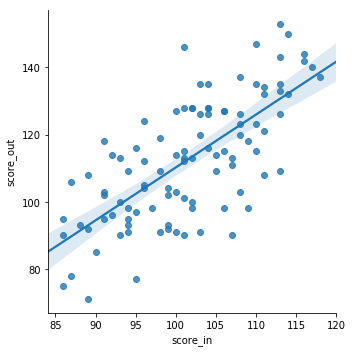

In [17]:
sns.lmplot('score_in', 'score_out', data=df);

All params

In [18]:
one_hot = pd.concat([df, pd.get_dummies(df['eyes']), pd.get_dummies(df['grade']), pd.get_dummies(df['sex'])], axis=1)

X = one_hot[['score_in', 'Blue', 'Brown', 'Green', 'High', 'Low', 'Female', 'Male']]
Y = df['score_out']

In [19]:
model = LinearRegression()

model.fit(X, Y)
score = mean_squared_error(model.predict(X), Y)

print('linear model estimator train error: {:.2f}'.format(score))

linear model estimator train error: 95.76


In [20]:
model = LinearRegression()
score = np.mean(-cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error'))

print('linear model estimator CV: {:.2f}'.format(score))

linear model estimator CV: 106.18


Predictions

In [22]:
model = LinearRegression()
model.fit(X, Y)

test_row = {
    'score_in': 90,
    'Blue': 0,
    'Brown': 1,
    'Green': 0,
    'High': 1,
    'Low': 0,
    'Female': 0,
    'Male': 1
}

score = model.predict(pd.DataFrame([test_row])[X.columns])[0]

print('Score is {:.2f}'.format(score))

Score is 114.22
